### Implementation on Hand-written digits

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [138]:
# Creating the auto encoder archieture
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3,stride=3,padding=1),
        nn.ReLU(),
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(16,1,kernel_size=3,stride=3,padding=1),
        nn.ReLU(),
    )

  def forward(self,x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [139]:
#Load MNISt dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

In [140]:
train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size = 64,
    shuffle =True
)

In [141]:
autoencoder = Autoencoder()
loss = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(autoencoder.parameters(), lr = 0.001)

num_epochs = 10

In [142]:
for epoch in range(num_epochs):
  running_loss = 0.0
  for data in train_loader:
    images, _ = data
    optimizer.zero_grad()
    noisy_images = images + 0.1 * torch.randn(images.size())
    outputs = autoencoder(noisy_images)
    # print(outputs.shape,images.shape)
    loss_value = loss(outputs, images)
    loss_value.backward()
    optimizer.step()
    running_loss += loss_value.item()
  print('Epoch [%d/%d], Loss: %.4f' % (epoch+1, num_epochs, running_loss / len(train_loader)))


Epoch [1/10], Loss: 0.6898
Epoch [2/10], Loss: 0.6578
Epoch [3/10], Loss: 0.6534
Epoch [4/10], Loss: 0.6517
Epoch [5/10], Loss: 0.6509
Epoch [6/10], Loss: 0.6503
Epoch [7/10], Loss: 0.6499
Epoch [8/10], Loss: 0.6496
Epoch [9/10], Loss: 0.6495
Epoch [10/10], Loss: 0.6494


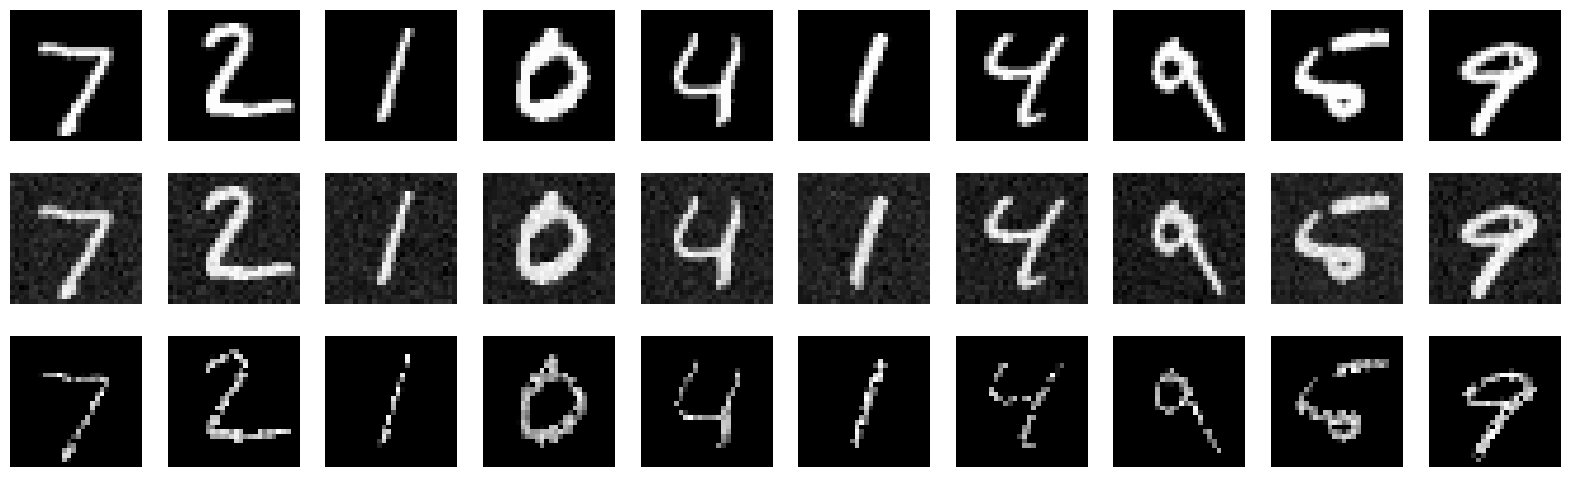

In [143]:
# Test the autoencoder
test_set = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=10,
    shuffle=False
)

with torch.no_grad():
    for data in test_loader:
        images, _ = data
        noisy_images = images + 0.1 * torch.randn(images.size())
        outputs = autoencoder(noisy_images)
        break

# Plot the original, noisy, and denoised images
plt.figure(figsize=(20, 6))
for i in range(10):
    plt.subplot(3, 10, i + 1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, 10, i + 11)
    plt.imshow(noisy_images[i].numpy().squeeze(), cmap='gray')
    plt.axis('off')
    plt.subplot(3, 10, i + 21)
    plt.imshow(outputs[i].numpy().squeeze(), cmap='gray')
    plt.axis('off')
plt.show()